NORMAL RANDOM FOREST WITH PREPROCESSED DATA

In [27]:
import pandas as pd
df = pd.read_csv("diabetes_data_preprocessed_big.csv", index_col=0)
df.shape

(100121, 45)

In [28]:
i = ['encounter_id', 'patient_nbr', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', \
          'age', 'A1Cresult', 'max_glu_serum', 'diag_1', 'diag_2', 'diag_3']
df[i] = df[i].astype('object')

In [29]:
df['age'] = df['age'].astype('int64')
print(df.age.value_counts())
# convert age categories to mid-point values
age_dict = {1:5, 2:15, 3:25, 4:35, 5:45, 6:55, 7:65, 8:75, 9:85, 10:95}
df['age'] = df.age.map(age_dict)
print(df.age.value_counts())

8     25564
7     22187
6     17102
9     16708
5      9626
4      3765
10     2669
3      1650
2       690
1       160
Name: age, dtype: int64
75    25564
65    22187
55    17102
85    16708
45     9626
35     3765
95     2669
25     1650
15      690
5       160
Name: age, dtype: int64


In [30]:
num_col = list(set(list(df._get_numeric_data().columns))- {'readmitted'})
print(num_col)

['num_medications', 'time_in_hospital', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_lab_procedures', 'number_inpatient', 'age', 'num_procedures']


In [31]:
import numpy as np
statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df[i].skew()
    skew_before.append(skewval)
    
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        log_type.append('log1p')
        skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
        skew_after.append(skewvalnew)
        kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
        kurt_after.append(kurtvalnew)
        sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
        standard_deviation_after.append(sdvalnew)
            
    else:
    
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [32]:
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        colname = str(statdataframe['numeric_column'][i])
        
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])
            
        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

In [33]:
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

In [34]:
numerics = list(set(list(df._get_numeric_data().columns))- {'readmitted'})

In [35]:
df.encounter_id = df.encounter_id.astype('int64')
df.patient_nbr = df.patient_nbr.astype('int64')
df.diabetesMed = df.diabetesMed.astype('int64')
df.change = df.change.astype('int64')

# convert data type of nominal features in dataframe to 'object' type for aggregating
i = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', \
          'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose','miglitol', \
          'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', \
          'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone','A1Cresult']
df[i] = df[i].astype('int64')

df.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                           int64
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                     int64
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                

In [36]:
dfcopy = df.copy(deep = True)
print(dfcopy['number_inpatient_log1p'])

0         0.000000
1         0.000000
2         0.693147
3         0.000000
4         0.000000
5         0.000000
6         0.000000
7         0.000000
8         0.000000
9         0.000000
10        0.000000
11        0.000000
12        0.000000
13        0.000000
14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21        0.000000
22        0.000000
23        0.000000
24        0.000000
25        0.000000
26        0.000000
27        0.000000
28        0.000000
29        0.000000
30        0.000000
31        0.000000
32        0.000000
33        0.000000
35        0.000000
36        0.000000
37        0.000000
38        0.000000
39        0.000000
40        0.000000
41        0.000000
42        0.693147
43        0.000000
45        0.000000
46        1.098612
47        0.693147
48        0.000000
49        0.000000
50        0.000000
51        0.000000
52        0.000000
53        0.000000
54        0.

In [37]:
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 2 else x)


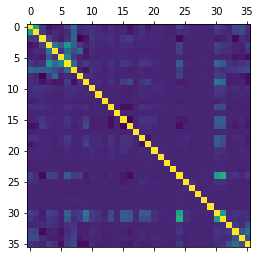

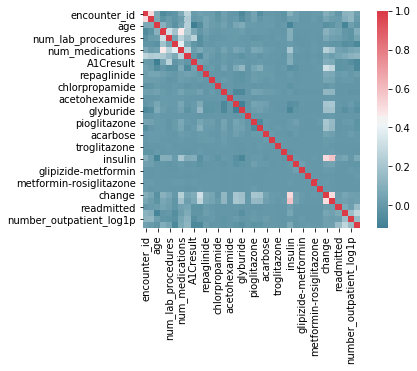

In [38]:
df.corr()
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()
import seaborn as sns
sns.heatmap(df.corr(), mask=np.zeros_like(df.corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

In [39]:
interactionterms = [('num_medications','time_in_hospital'),
('num_medications','num_procedures'),
('time_in_hospital','num_lab_procedures'),
('num_medications','num_lab_procedures'),
('num_medications','number_diagnoses'),
('age','number_diagnoses'),
('change','num_medications'),
('number_diagnoses','time_in_hospital')]

In [40]:
for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    df[name] = df[inter[0]] * df[inter[1]]

In [41]:
df[['num_medications','time_in_hospital', 'num_medications|time_in_hospital']].head()

,num_medications,time_in_hospital,num_medications|time_in_hospital
0,1,1,1
1,18,3,54
2,13,2,26
3,16,2,32
4,8,1,8


In [42]:
datf = pd.DataFrame()
datf['features'] = numerics
datf['std_dev'] = datf['features'].apply(lambda x: df[x].std())
datf['mean'] = datf['features'].apply(lambda x: df[x].mean())

In [43]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape
pd.options.display.max_rows = 400

c = df2.corr().abs()
s = c.unstack()
print(s.shape)
so = s.sort_values(ascending=False)

so[38:120]

(1936,)


glyburide                            glyburide                              1.000000
tolbutamide                          tolbutamide                            1.000000
age|number_diagnoses                 age|number_diagnoses                   1.000000
miglitol                             miglitol                               1.000000
encounter_id                         encounter_id                           1.000000
number_diagnoses|time_in_hospital    time_in_hospital                       0.939857
time_in_hospital                     number_diagnoses|time_in_hospital      0.939857
num_medications                      num_medications|number_diagnoses       0.911775
num_medications|number_diagnoses     num_medications                        0.911775
time_in_hospital                     time_in_hospital|num_lab_procedures    0.862017
time_in_hospital|num_lab_procedures  time_in_hospital                       0.862017
num_procedures                       num_medications|num_procedur

In [44]:
df_pd = pd.get_dummies(df2, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
                                      'admission_source_id', 'max_glu_serum', 'A1Cresult'], drop_first = True)
print(df_pd.columns)

Index(['encounter_id', 'patient_nbr', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'number_emergency_log1p', 'number_outpatient_log1p',
       'number_inpatient_log1p', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|

In [45]:
non_num_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'diag_1' ,'diag_2','diag_3']


In [46]:
num_cols = list(set(list(df._get_numeric_data().columns))- {'readmitted', 'change'})
num_cols

['metformin-pioglitazone',
 'acetohexamide',
 'acarbose',
 'rosiglitazone',
 'metformin',
 'diabetesMed',
 'pioglitazone',
 'number_outpatient_log1p',
 'insulin',
 'miglitol',
 'num_procedures',
 'glipizide-metformin',
 'num_medications',
 'time_in_hospital',
 'number_diagnoses',
 'number_diagnoses|time_in_hospital',
 'num_medications|time_in_hospital',
 'nateglinide',
 'num_medications|num_procedures',
 'number_inpatient_log1p',
 'num_medications|num_lab_procedures',
 'chlorpropamide',
 'glimepiride-pioglitazone',
 'glimepiride',
 'num_lab_procedures',
 'A1Cresult',
 'num_medications|number_diagnoses',
 'glyburide',
 'age',
 'encounter_id',
 'number_emergency_log1p',
 'age|number_diagnoses',
 'patient_nbr',
 'repaglinide',
 'troglitazone',
 'glyburide-metformin',
 'time_in_hospital|num_lab_procedures',
 'tolbutamide',
 'change|num_medications',
 'tolazamide',
 'metformin-rosiglitazone',
 'glipizide']

In [47]:
new_non_num_cols = []
for i in non_num_cols:
    for j in df_pd.columns:
        if i in j:
            new_non_num_cols.append(j)

In [48]:

l = []
for feature in list(df_pd.columns):
    if '|' in feature:
        l.append(feature)
l


['num_medications|time_in_hospital',
 'num_medications|num_procedures',
 'time_in_hospital|num_lab_procedures',
 'num_medications|num_lab_procedures',
 'num_medications|number_diagnoses',
 'age|number_diagnoses',
 'change|num_medications',
 'number_diagnoses|time_in_hospital']

In [49]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0', 'max_glu_serum_1', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                  'diag_1','diag_2','diag_3']

In [50]:
train_input = df_pd[feature_set]
train_output = df_pd['readmitted']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_input, train_output, test_size=0.20, random_state=0)

In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train, Y_train)

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
forrest = RandomForestClassifier(n_estimators = 200, max_depth=5, criterion = "gini", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, train_input_new, train_output_new, cv=10))))
forrest.fit(train_input_new, train_output_new)
print("test Set score: {:.2%}".format(forrest.score(X_test, Y_test)))
Y_test_predict = forrest.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(Y_test_predict, name = 'Predict'), margins = True)
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, Y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(Y_test, Y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(Y_test, Y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(Y_test, Y_test_predict)))
print("f1 is {0:.2f}".format(f1_score(Y_test, Y_test_predict)))


Cross Validation score: 89.48%
test Set score: 86.24%
Accuracy is 0.86
Precision is 0.16
Recall is 0.12
AUC is 0.53
f1 is 0.14


feature importance